In [ ]:
! pip install hazm

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from hazm import Normalizer, word_tokenize


Read and Display the first few rows

In [ ]:
data =  pd.read_csv('train_data.csv')

In [ ]:
print(data.head())

   overall  vote  verified  reviewTime      reviewerID        asin style  \
0        2   NaN     False  2016-11-11   A2OSUEZJIN7BI  0511189877   NaN   
1        5   NaN      True  2016-06-06  A2NETQRG6JHIG7  0511189877   NaN   
2        4   NaN      True  2016-03-10  A12JHGROAX49G7  0511189877   NaN   
3        5   NaN      True  2016-01-14  A1KV65E2TMMG6F  0511189877   NaN   
4        5   NaN      True  2016-10-20  A280POPEWI0NSA  0594459451   NaN   

    reviewerName                                         reviewText  \
0          Chris  I have an older URC-WR7 remote and thought thi...   
1   Qrysta White  First time I've EVER had a remote that needed ...   
2        Linwood  Got them and only 2 of them worked. company ca...   
3  Dane Williams  I got tired of the remote being on the wrong s...   
4    Kristina H.  After purchasing cheap cords from another webs...   

                               summary  unixReviewTime  
0                         Cannot Learn    1.478822e+09  
1 

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100925 entries, 0 to 100924
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         100925 non-null  int64  
 1   vote            18107 non-null   float64
 2   verified        100925 non-null  bool   
 3   reviewTime      100925 non-null  object 
 4   reviewerID      100925 non-null  object 
 5   asin            100925 non-null  object 
 6   style           68816 non-null   object 
 7   reviewerName    100894 non-null  object 
 8   reviewText      100925 non-null  object 
 9   summary         100913 non-null  object 
 10  unixReviewTime  100924 non-null  float64
dtypes: bool(1), float64(2), int64(1), object(7)
memory usage: 7.8+ MB
None


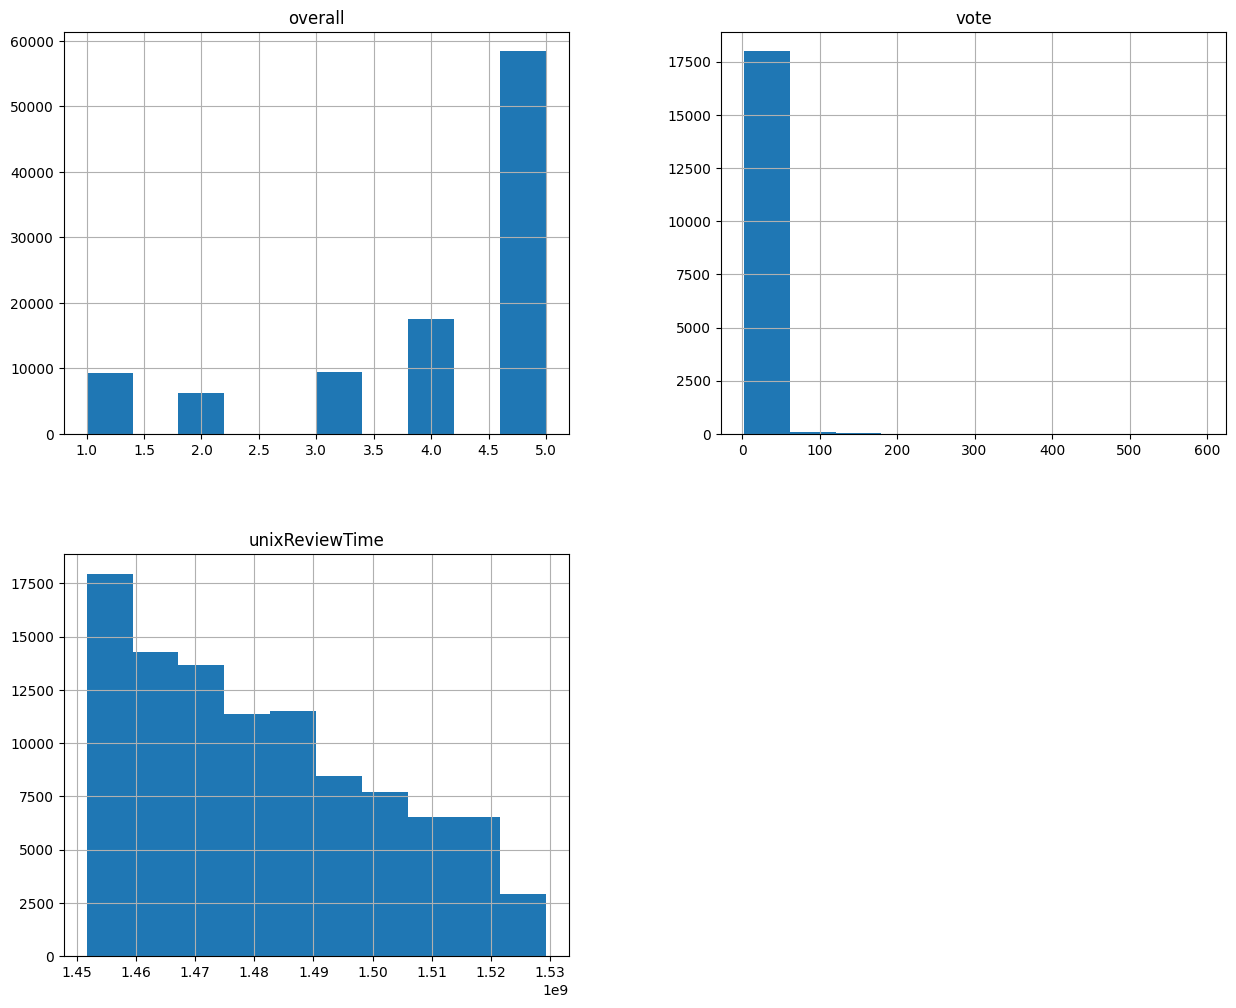

In [ ]:
data.hist(figsize=(15, 12))
plt.show()

checking the balance

In [ ]:
def plot_overall_distribution(data):
    plt.figure(figsize=(8, 5))
    data['overall'].value_counts().sort_index().plot(kind='bar')
    plt.title('Distribution of Overall Ratings')
    plt.xlabel('Ratings')
    plt.ylabel('Count')
    plt.show()

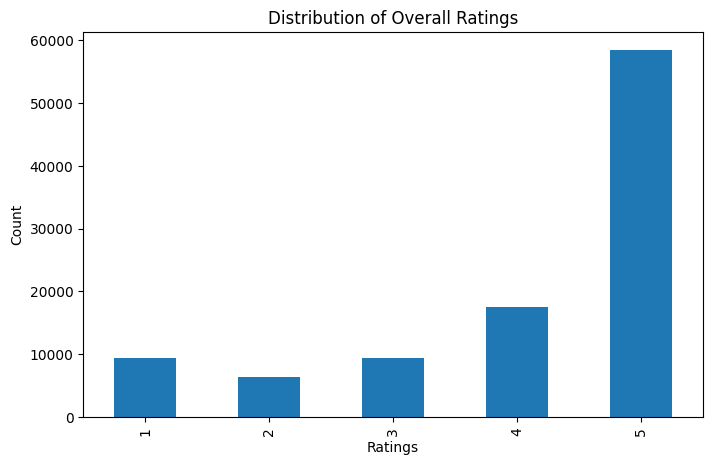

In [ ]:
plot_overall_distribution(data)

checking the balance

In [ ]:
counts = data['overall'].value_counts()
is_balanced = counts.max() - counts.min() < 0.2 * len(data)
if not is_balanced:
    print("Dataset is imbalanced.")
else:
    print("Dataset is balanced.")

Dataset is imbalanced.


categorize comments

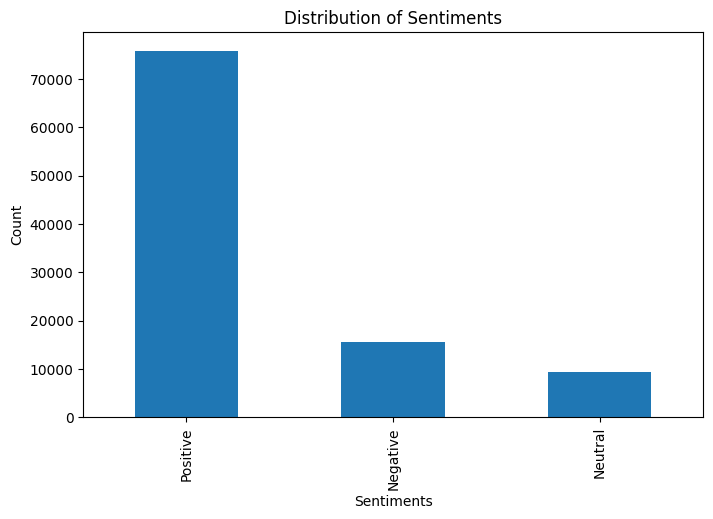

In [31]:
def classify_sentiments(row):
    if row['overall'] in [4, 5]:
        return 'Positive'
    elif row['overall'] == 3:
        return 'Neutral'
    else:
        return 'Negative'

data['Sentiment'] = data.apply(classify_sentiments, axis=1)
plt.figure(figsize=(8, 5))
data['Sentiment'].value_counts().plot(kind='bar')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiments')
plt.ylabel('Count')
plt.show()


the most frequent word

In [35]:
def generate_wordcloud(data, sentiment):
    normalizer = Normalizer()
    text = " ".join(data[data['Sentiment'] == sentiment]['reviewText'].fillna(""))
    text = normalizer.normalize(text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in STOPWORDS]
    wordcloud = WordCloud(
        width=800, height=400, background_color='white',
        stopwords=STOPWORDS, colormap='viridis'
    ).generate(" ".join(tokens))

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment}')
    plt.show()

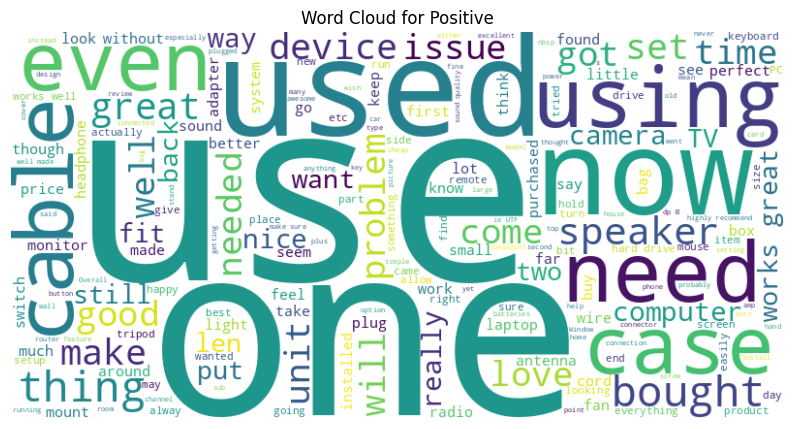

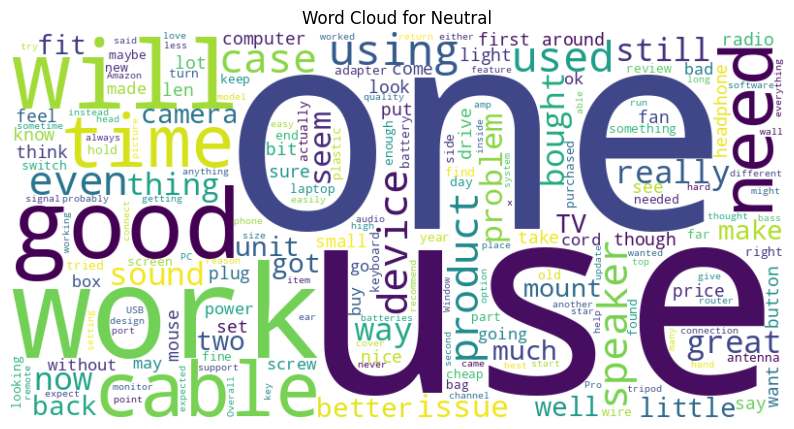

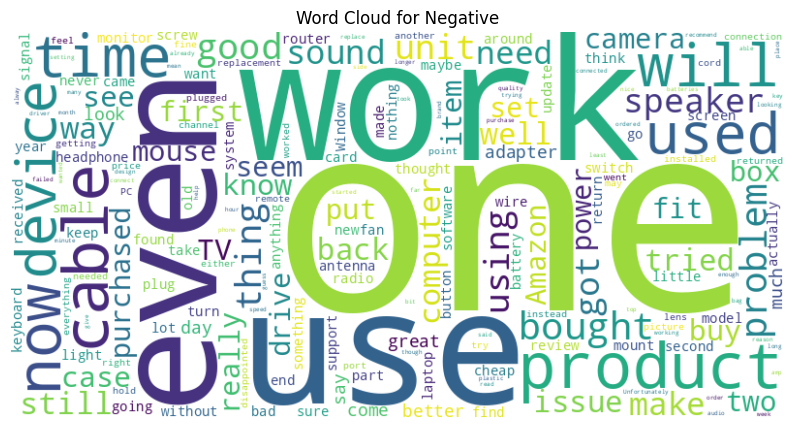

In [37]:
for sentiment in ['Positive', 'Neutral', 'Negative']:
    generate_wordcloud(data, sentiment)

In [38]:
positive_words = Counter(word_tokenize(" ".join(data[data['Sentiment'] == 'Positive']['reviewText'].fillna("")).lower()))
negative_words = Counter(word_tokenize(" ".join(data[data['Sentiment'] == 'Negative']['reviewText'].fillna("")).lower()))
common_words = set(positive_words.keys()) & set(negative_words.keys())

print(f"Common words between Positive and Negative reviews: {list(common_words)[:10]}")

Common words between Positive and Negative reviews: ['assured', 'xxxxxx', 'borrowing', 'stashed', 'keys,', 'hs,', 'submerge', 'unresponsive,', 'box;', 'backdoor']


Top 10 reviewers

In [41]:
def top_reviewers_by_votes(data):
    vote_data = data.groupby('reviewerID')['vote'].sum().sort_values(ascending=False).head(10)
    top_reviewers = pd.DataFrame({'reviewerID': vote_data.index, 'TotalVotes': vote_data.values})
    print(top_reviewers)

top_reviewers_by_votes(data)


       reviewerID  TotalVotes
0  A1AKXOZAUFT984       595.0
1   AUYAZMEO659OX       442.0
2   ATVAVKMC3XBSN       439.0
3   AXDVANLIPLRDL       426.0
4   A56DOAEMR18YB       394.0
5   AC5662P1M5509       384.0
6  A1I7GW7XZNGTF2       358.0
7   AE0ZPWTODYK08       335.0
8  A2D8SPV5ITIN58       331.0
9  A250ZSZMO4P67S       318.0


reviewText

In [42]:
def plot_review_length_histogram(data, bins=50, filter_outliers=False):
    review_lengths = data['reviewText'].apply(len)
    if filter_outliers:
        review_lengths = review_lengths[review_lengths.between(review_lengths.quantile(0.05), review_lengths.quantile(0.95))]

    plt.figure(figsize=(10, 6))
    plt.hist(review_lengths, bins=bins, color='purple', alpha=0.7)
    plt.title('Histogram of Review Text Lengths' + (" (Filtered)" if filter_outliers else ""))
    plt.xlabel('Number of Characters')
    plt.ylabel('Frequency')
    plt.show()

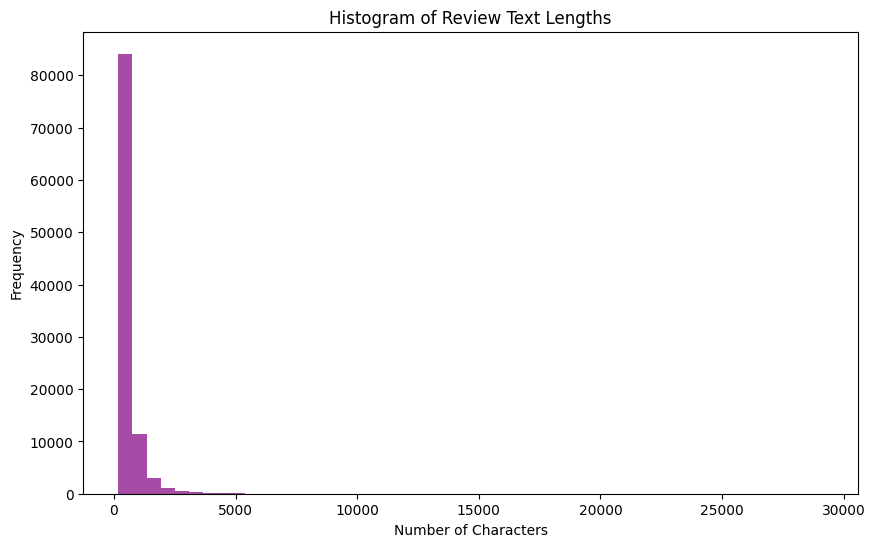

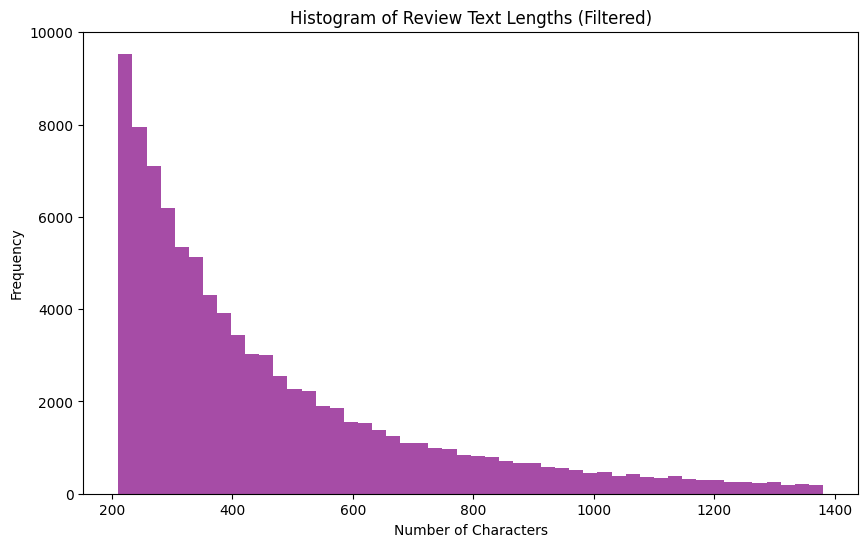

In [43]:
plot_review_length_histogram(data, bins=50, filter_outliers=False)
plot_review_length_histogram(data, bins=50, filter_outliers=True)

In [44]:
print("Recommended range for review text length: {} to {} characters".format(
    int(data['reviewText'].apply(len).quantile(0.05)),
    int(data['reviewText'].apply(len).quantile(0.95))
))

Recommended range for review text length: 211 to 1380 characters


Top products

In [45]:
def top_products_with_high_ratings(data):
    top_products = data[data['overall'] == 5].groupby('asin').size().sort_values(ascending=False).head(10)
    product_details = data[data['asin'].isin(top_products.index)][['asin', 'summary']].drop_duplicates()
    top_products_df = pd.DataFrame({'asin': top_products.index, 'count': top_products.values})
    top_products_df = top_products_df.merge(product_details, on='asin', how='left')
    print(top_products_df[['summary', 'asin', 'count']])

top_products_with_high_ratings(data)

                                                summary        asin  count
0                              Great way to reuse a SSD  B000VS4HDM    597
1     I have been carrying this adapter as my daily ...  B000VS4HDM    597
2                              Very nice quality cable.  B000VS4HDM    597
3     Works better than an external hard drive enclo...  B000VS4HDM    597
4                                 Very good data cable.  B000VS4HDM    597
...                                                 ...         ...    ...
4707                                           Awesome.  B000FNFSPY    336
4708      Here's to getting more switches of this kind.  B000FNFSPY    336
4709                  It's a switch and works like one.  B000FNFSPY    336
4710                                     I feel robbed.  B000FNFSPY    336
4711  Efficient switch, read the Amazon reviews for ...  B000FNFSPY    336

[4712 rows x 3 columns]


In [46]:
def top_brands_with_average_ratings(data):
    data['brand'] = data['style'].apply(lambda x: eval(x).get('brand', 'Unknown') if pd.notnull(x) else 'Unknown')

    top_brands = data.groupby('brand').size().sort_values(ascending=False).head(10)
    top_brands_avg_rating = data[data['brand'].isin(top_brands.index)].groupby('brand')['overall'].mean().sort_values(ascending=False)
    top_brands_df = pd.DataFrame({'brand': top_brands_avg_rating.index, 'average_rating': top_brands_avg_rating.values})
    print(top_brands_df)

top_brands_with_average_ratings(data)

     brand  average_rating
0  Unknown          4.0832


In [47]:
print(data['brand'].value_counts().head())

brand
Unknown    100925
Name: count, dtype: int64


In [48]:
print(data['style'].dropna().head())

17      {'Format:': ' Spiral-bound'}
18      {'Format:': ' Spiral-bound'}
19      {'Format:': ' Spiral-bound'}
20    {'Format:': ' Kindle Edition'}
38              {'Color:': ' Black'}
Name: style, dtype: object


In [49]:
print(data[data['brand'] == 'Unknown']['overall'].mean())

4.083200396333911
